#### Importamos las librerías necesarias para el análisis

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

# Cálculo de intervalo de confianza en python

#### En esta práctica no contamos con un dataset, lo haremos sobre una distribución creada por computadora.

In [18]:
# Aqui creamos dos distribuciones de variables de manera aleatoria
np.random.seed(20) # Definimos una semilla para que el resultado sea reproducibles
var1 = np.random.randint(0, 10, 10) # genera 10 números aleatorios entre 0 y 10 días de vacaciones
var2 = var1+np.random.normal(0, 1, 10) # genera 10 números aleatorios entre 0 y 1 de una distribución normal
# np.random.normal(0, 1, 10) Esto añade variabilidad o ruido aleatorio a los valores de var1
# var1 + np.random.normal(...) Representa "dinero gastado" como una variable relacionada con 
# los días de vacaciones (más días de vacaciones tienden a resultar en más dinero gastado, 
# pero con variabilidad)


In [19]:
var1

array([3, 9, 4, 6, 7, 2, 0, 6, 8, 5], dtype=int32)

In [20]:
var2

array([1.91516741, 9.55969629, 4.93946935, 5.02151896, 7.50309684,
       2.40641447, 0.32346101, 5.50658912, 7.20798321, 4.15763207])

#### Visualización de resultados con un intervalo de confianza del 80%

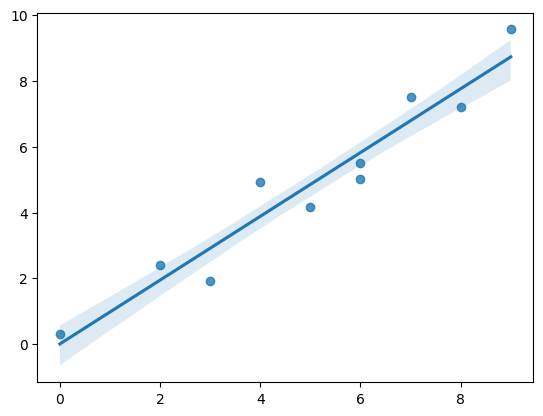

In [21]:
# Este es un ejemplo de visualización de un intervalo de confianza del 80%
# el cual se mostrará como una sombra de color a lado y lado de la linea de tendencia.
grafico = sns.regplot(x=var1, y=var2, ci=80)

# Efectivamente vemos que entre más días de vacaciones, mayor dinero gastado

Ahora lo que queremos ver, es cuales son estos numeros de CI = 80.

In [22]:
# Unimos las variables var1 y var2 (estamos creando un tuple) usando la función zip (en español cremallera)
tuple = list(zip(var1, var2))
tuple

[(np.int32(3), np.float64(1.9151674126826672)),
 (np.int32(9), np.float64(9.559696289403918)),
 (np.int32(4), np.float64(4.939469349856077)),
 (np.int32(6), np.float64(5.021518957881304)),
 (np.int32(7), np.float64(7.503096840109191)),
 (np.int32(2), np.float64(2.406414468894801)),
 (np.int32(0), np.float64(0.3234610099156434)),
 (np.int32(6), np.float64(5.50658911809112)),
 (np.int32(8), np.float64(7.207983209222818)),
 (np.int32(5), np.float64(4.157632065861516))]

In [23]:
# Transformamos el tuple a un dataframe 
tabla = pd.DataFrame(tuple,
                  columns = ['Días_vacaciones', 'Dinero_gastado'])
tabla

,Días_vacaciones,Dinero_gastado
0,3,1.915167
1,9,9.559696
2,4,4.939469
3,6,5.021519
4,7,7.503097
5,2,2.406414
6,0,0.323461
7,6,5.506589
8,8,7.207983
9,5,4.157632


In [24]:
print(np.mean(tabla['Dinero_gastado']))
print(np.mean(tabla['Días_vacaciones']))

4.8541028721919055
5.0


In [28]:
# Apoyandonos en la librería scipy
# Calculamos los intervalos de confianza a un 95% para ambas variables

st.t.interval(confidence=0.68, df=len(tabla)-1, loc=np.mean(tabla), scale=st.sem(tabla))

# st.t.interval:Esta función calcula el intervalo de confianza utilizando la 
# distribución t de Student. Es útil cuando trabajas con muestras pequeñas y 
# no conoces la desviación estándar poblacional.

# si n >= 30 , mejor usamos st.norm.interval

# loc=np.mean(tabla) Calcula la media de ambas variables: Días_vacaciones y Dinero_gastado

# scale=st.sem(tabla) representa el error estándar de la media.
# calcula este valor dividiendo la desviación estándar de la 
# muestra entre la raíz cuadrada de su tamaño n.

# Resultado: El intervalo de confianza 95% va entre:
# 2.84 días y 3 días (es practicamente seguro que las personas salgan por 3 días)
# 6.86 (68%)  y 6.99 (69%) pesos (es practicamente seguro que las personas gasten el 69% de su dinero)

(array([3.99882002, 3.99351844]), array([5.85528285, 5.86058443]))


# ¿Qué es un intervalo de confianza?

Un **intervalo de confianza (IC)** es un rango de valores que tiene una cierta probabilidad de contener la verdadera **media poblacional** del parámetro de interés.  
El **nivel de confianza** (por ejemplo, 95%) indica la certeza que tenemos de que el intervalo incluye el este valor verdadero.

# ¿Para qué sirve un intervalo de confianza?

### 1. Estimar parámetros desconocidos  
Nos ayuda a entender dónde puede estar la **media real de la población** sin tener que medir todos los datos.

**Ejemplo:**  
Si queremos saber el salario promedio de un país, podemos calcularlo con una muestra, y el IC nos da un rango plausible.

### 2. Tomar decisiones  
Permite evaluar si los resultados cumplen con lo esperado.

**Ejemplo:**  
Si estás analizando si una nueva política mejora los ingresos, puedes observar si el IC incluye o no el valor esperado.

### 3. Medir la incertidumbre  
El IC nos muestra qué tan **precisos** son los resultados, indicando el grado de confianza en las estimaciones.

# ¿Por qué varía el nivel de confianza (CI)?

El **nivel de confianza (CI)** indica qué tan seguros queremos estar de que el intervalo contiene la **media real**:

- **68%:** Intervalos más estrechos, pero menos confiables (más margen de error).
- **95%:** Más usado: intervalos suficientemente precisos y confiables.
- **99% o más:** Intervalos más amplios para mayor seguridad, pero menos útiles porque son menos precisos.

### Ejemplo práctico:

- **CI del 68%:** "Estoy **algo** seguro, pero podría estar equivocado."
- **CI del 95%:** "Estoy **razonablemente** seguro y es un estándar."
- **CI del 99%:** "Estoy **casi completamente** seguro, pero el rango puede ser muy amplio."

# ¿Cómo se escoge el nivel de confianza?

Depende de:

### 1. El propósito del análisis  
- Si necesitas alta **seguridad**, usa un **CI mayor (99%)**.
- Si quieres **intervalos más específicos**, usa un **CI menor (68% o 90%)**.

### 2. La importancia del error  
- En **decisiones críticas** (medicina, inversiones), priorizas niveles más altos de  
  seguridad con la contra parte de que tendras un intervalo más amplio. (**99%**).
- En **análisis exploratorios o rápidos**, un **CI del 95%** suele ser suficiente.

### 3. Convenciones del campo  
- En **investigación académica**, el **95%** es el más usado.

# Ejemplo para dummies

Imagina que estás probando el rendimiento promedio de un carro nuevo:

### Con un CI del 95%
Obtienes un intervalo de **(15 km/L, 20 km/L)**.  
Esto significa que estás **95% seguro** de que el consumo real está en este rango.

### Con un CI del 99%
El intervalo es **(13 km/L, 22 km/L)**.  
Aquí tienes más confianza, pero el rango es más amplio.

### Con un CI del 68%
El intervalo es **(17 km/L, 19 km/L)**.  
Es un rango más preciso, pero es más probable que **no contenga la media real**.